In [14]:
import pandas as pd 
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [15]:
data = pd.read_csv('690a-vazao-vila-aurea-20-04-2016.csv')

data_matrix = data.as_matrix()

data_matrix = data_matrix[340519:,2:]        # Elimina os termos nan da matriz

#data_matrix = np.nan_to_num(data_matrix)    # Tentei usar este comando para eliminar o 
                                             # termo nan, porém não funcionou                              
minutos = data_matrix.shape[0]

print "Total de minutos:", minutos

#print data_matrix

Total de minutos: 186238


In [16]:
def media_janela (data_matrix, minutos, janela): 
    
    media = []
    for i in range (janela):
        media.append(np.mean(data_matrix[0:i + 1]))
        
    i += 1
           
    for i in range (i , minutos):
        media.append(np.mean(data_matrix[i - janela:i]))
         
    return media


In [17]:
def media_desvio_janela (data_matrix, minutos, janela): 
    
    media = []
    desvio = []
    for i in range (janela):
        media.append(np.mean(data_matrix[0:i + 1]))
        desvio.append(np.std(data_matrix[0:i + 1]))
        
    i += 1
           
    for i in range (i , minutos):
        media.append(np.mean(data_matrix[i - janela:i]))
        desvio.append(np.std(data_matrix[i - janela:i]))
         
    return media, desvio


In [18]:
def plot_grafico1 (data_matrix, qtde_minutos, janela): 
    
    minutos = data_matrix.shape[0]
    
    media = media_janela(data_matrix, minutos, janela)

    indice = minutos - qtde_minutos

    x = np.arange(1, qtde_minutos + 1, 1)
    y = media[indice:]
    
    plt.plot(x, y, label = u'Média', color = 'blue')
    
    plt.title(u'Média da vazão com janela %i'%(janela), fontsize = 20)
    plt.xlabel('%i minutos mais recentes'%(qtde_minutos), fontsize = 20)
    plt.ylabel(u'Vazão',  fontsize = 20)
    
    plt.legend(loc = 'upper right', fontsize = 'xx-large')
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)

    plt.show()

In [19]:
def plot_grafico1_desvio (data_matrix, qtde_minutos, janela): 
    
    minutos = data_matrix.shape[0]
    
    media, desvio = media_desvio_janela(data_matrix, minutos, janela)
    
    indice = minutos - qtde_minutos

    x = np.arange(1, qtde_minutos + 1, 1)
    y = media[indice:]
    
    desvio = np.asarray(desvio[indice:],  dtype=np.float32)
        
    y1 = np.asarray(y,dtype=np.float32)
    y1 = y1 + desvio
    
    y2 = np.asarray(y, dtype=np.float32)
    y2 = y2 - desvio
        
    plt.plot(x, y, label = u'Média', color = 'blue')
    plt.plot(x, y1, label = 'Desvio para mais', linestyle = ':', color = 'red')
    plt.plot(x, y2, label = 'Desvio para menos', linestyle = ':', color = 'green')
    
    plt.legend(loc = 'upper right', fontsize = 'xx-large')

    
    plt.title(u'Média da vazão com janela %i e desvio padrão'%(janela), fontsize = 20)
    plt.xlabel('%i minutos mais recentes'%(qtde_minutos), fontsize = 20)
    plt.ylabel(u'Vazão',  fontsize = 20)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)

  
    plt.show()

In [20]:
def plot_grafico2 (data_matrix, qtde_minutos, janela1, janela2):
    
    minutos = data_matrix.shape[0]
    
    media1 = media_janela(data_matrix, minutos, janela1)
    media2 = media_janela(data_matrix, minutos, janela2)

    indice = minutos - qtde_minutos

    x = np.arange(1, qtde_minutos + 1, 1)

    y1 = media1[indice:]
    y2 = media2[indice:]
    
    plt.title(u'Médias da vazão com janelas %i e %i'%(janela1,janela2), fontsize = 20)
    plt.xlabel('%i minutos mais recentes'%(qtde_minutos), fontsize = 20)
    plt.ylabel(u'Vazão',  fontsize = 20)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)

    plt.plot(x, y1, label = 'Janela %i'%(janela1), color = 'red')
    plt.plot(x, y2, label = 'Janela %i'%(janela2), color = 'blue')
    
    plt.legend(loc = 'upper right', fontsize = 'xx-large')

    plt.show()

In [21]:
def plot_grafico3 (data_matrix, qtde_minutos, janela1, janela2, janela3):
    
    minutos = data_matrix.shape[0]
    
    media1 = media_janela(data_matrix, minutos, janela1)
    media2 = media_janela(data_matrix, minutos, janela2)
    media3 = media_janela(data_matrix, minutos, janela3)

    indice = minutos - qtde_minutos

    x = np.arange(1, qtde_minutos + 1, 1)

    y1 = media1[indice:]
    y2 = media2[indice:]
    y3 = media3[indice:]
    
    plt.title(u'Médias da vazão com janelas %i, %i e %i'%(janela1,janela2,janela3), fontsize = 20)
    plt.xlabel('%i minutos  mais recentes'%(qtde_minutos), fontsize = 20)
    plt.ylabel(u'Vazão',  fontsize = 20)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)

    plt.plot(x, y1, label = 'Janela %i'%(janela1), color = 'orange')
    plt.plot(x, y2, label = 'Janela %i'%(janela2), color = 'blue')
    plt.plot(x, y3, label = 'Janela %i'%(janela3), color = 'red')
    
    plt.legend(loc = 'upper right', fontsize = 'xx-large')

    plt.show()

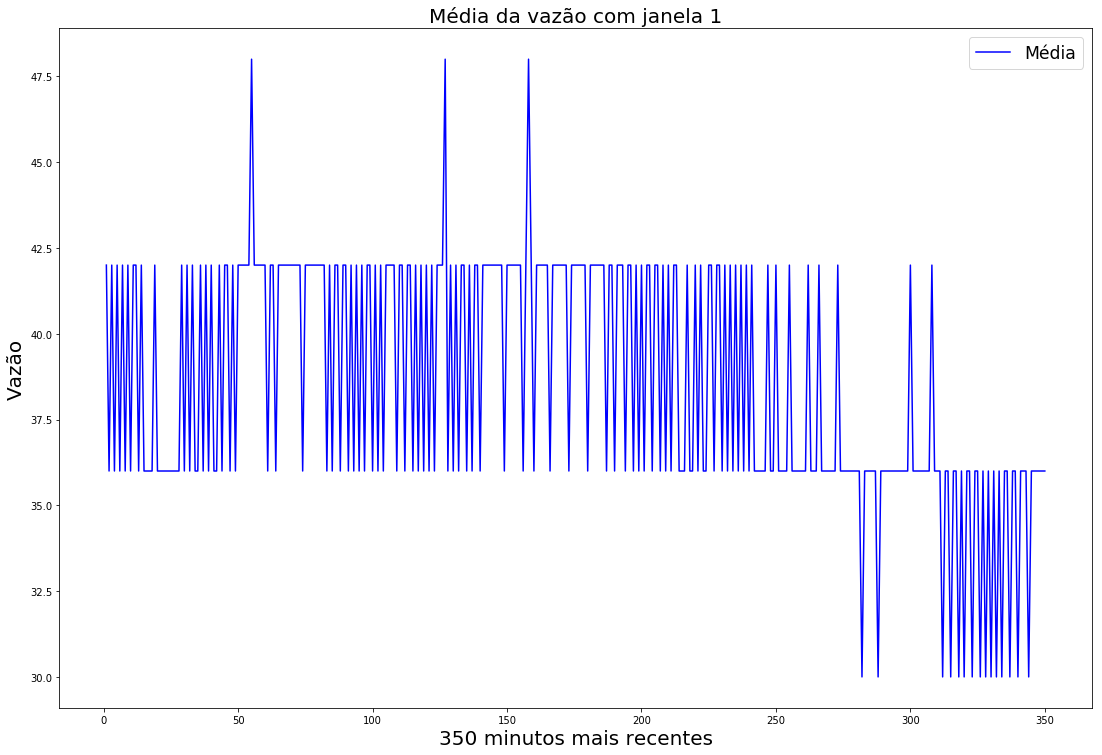

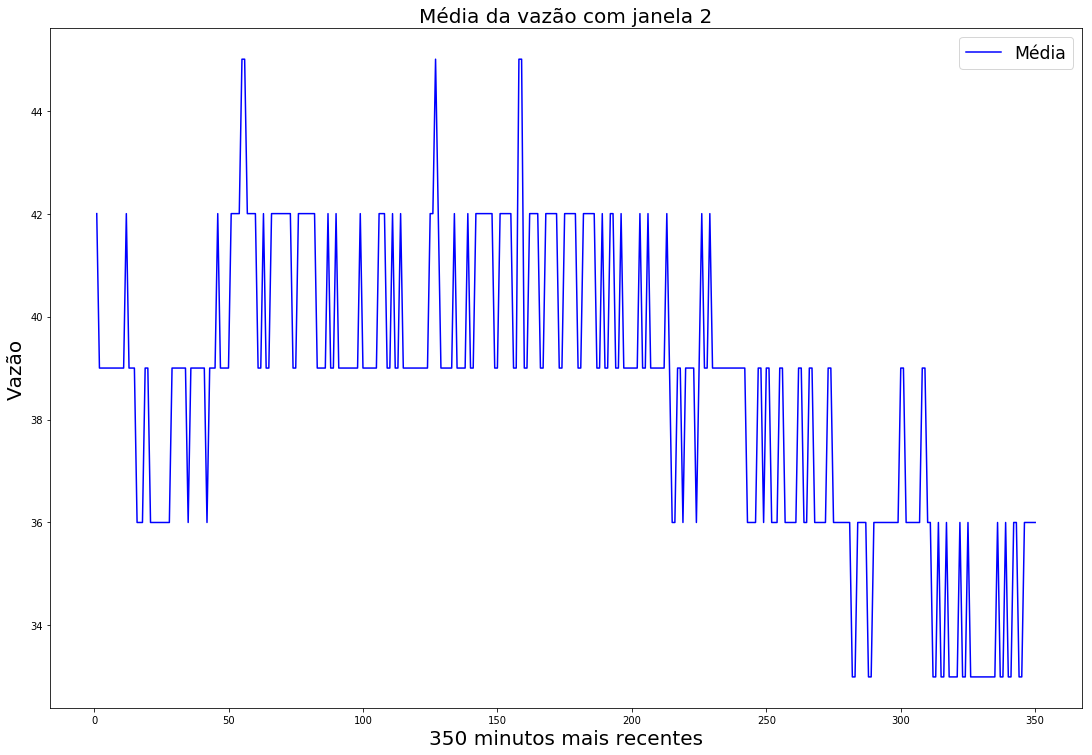

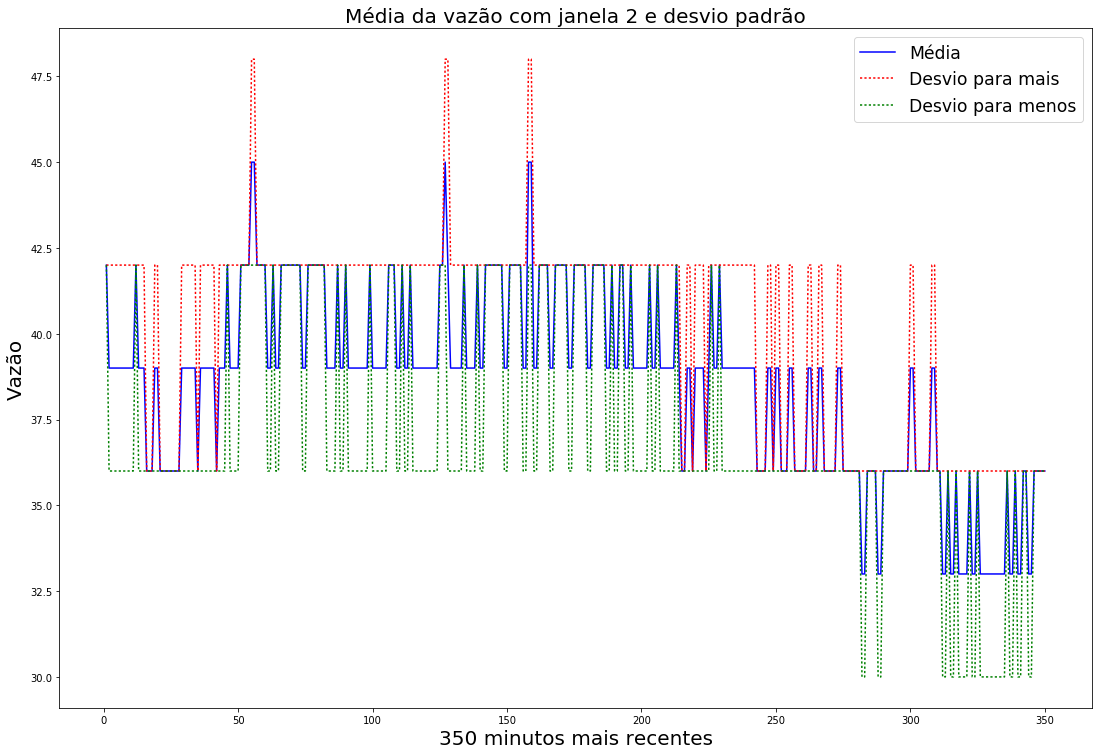

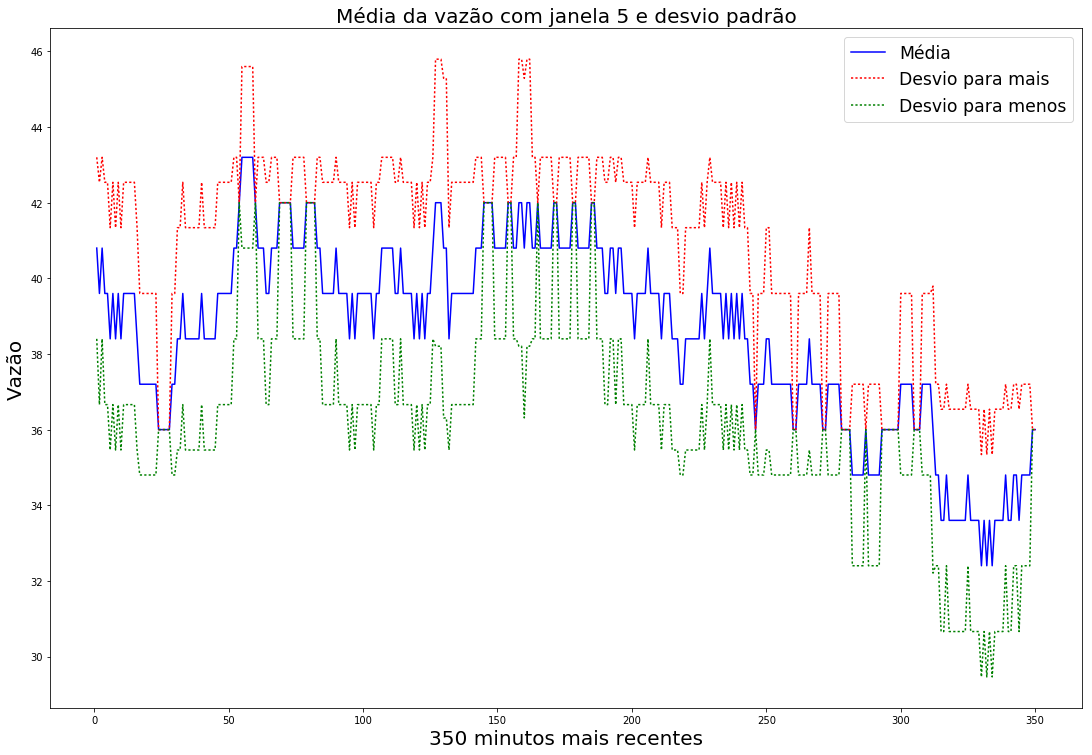

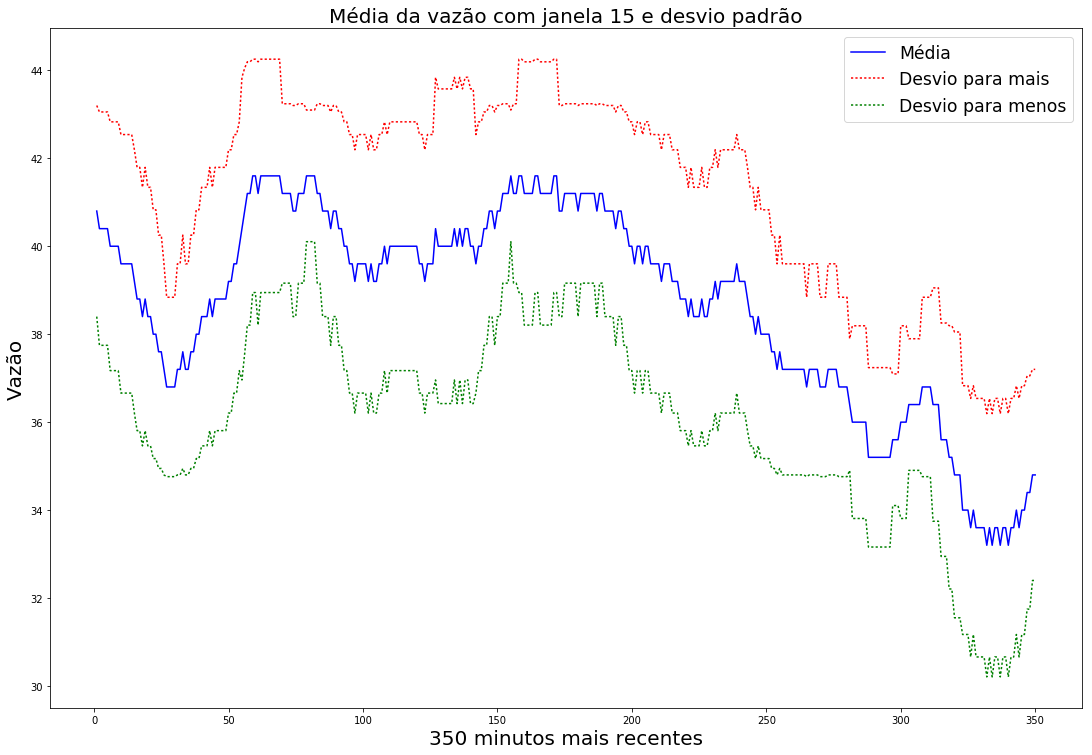

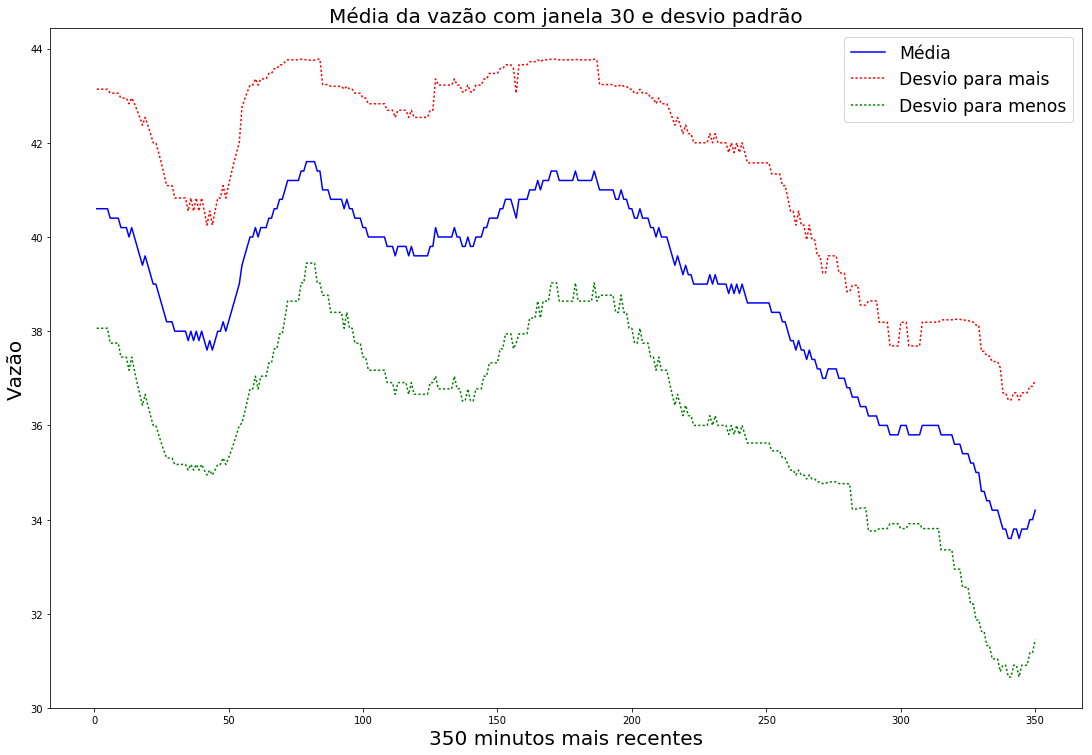

In [22]:
qtde_minutos = 350
plot_grafico1 (data_matrix, qtde_minutos, 1)
plot_grafico1 (data_matrix, qtde_minutos, 2)
plot_grafico1_desvio (data_matrix, qtde_minutos, 2)
plot_grafico1_desvio (data_matrix, qtde_minutos, 5)
plot_grafico1_desvio (data_matrix, qtde_minutos, 15)
plot_grafico1_desvio (data_matrix, qtde_minutos, 30)

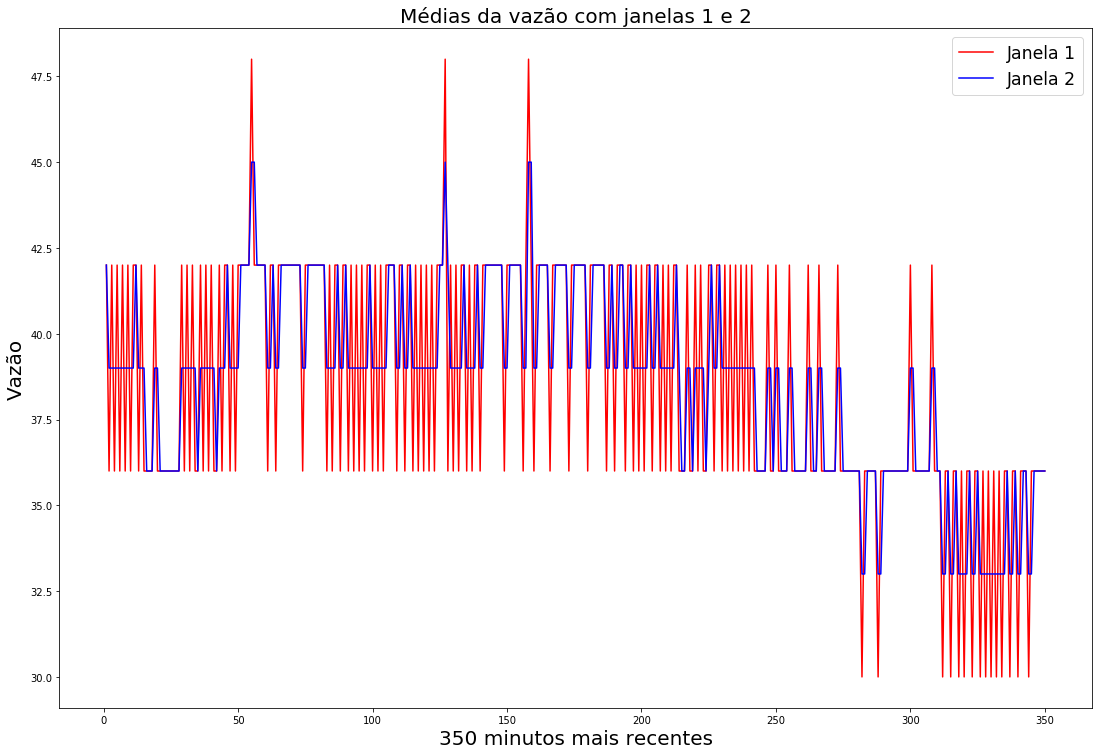

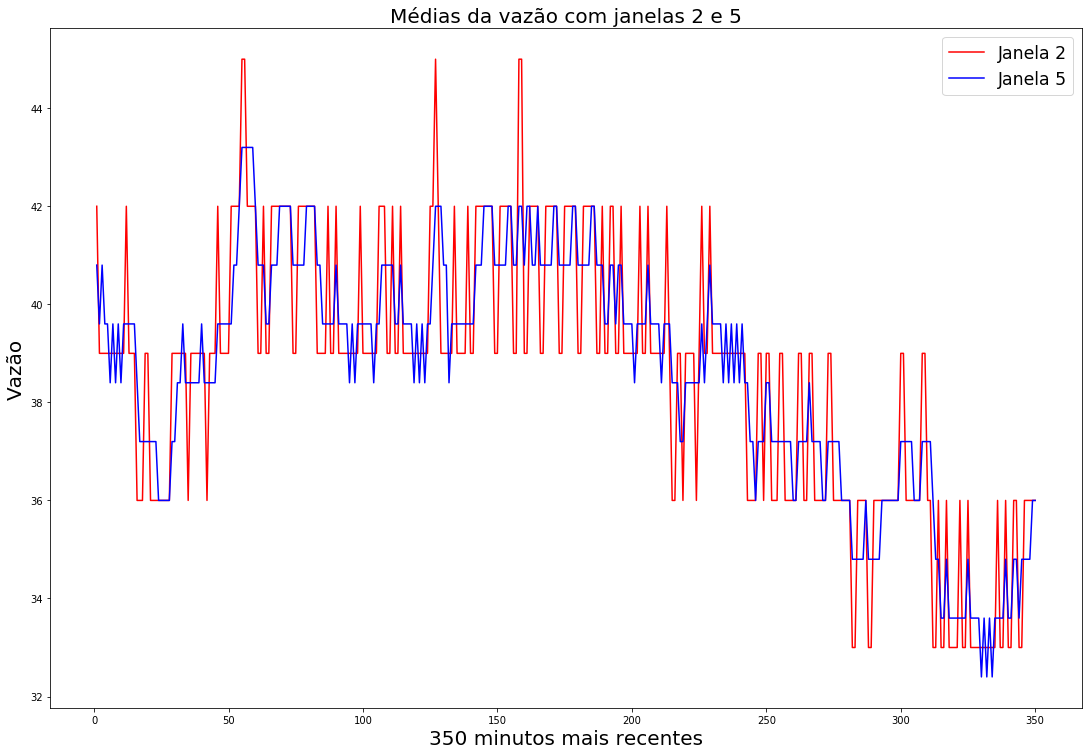

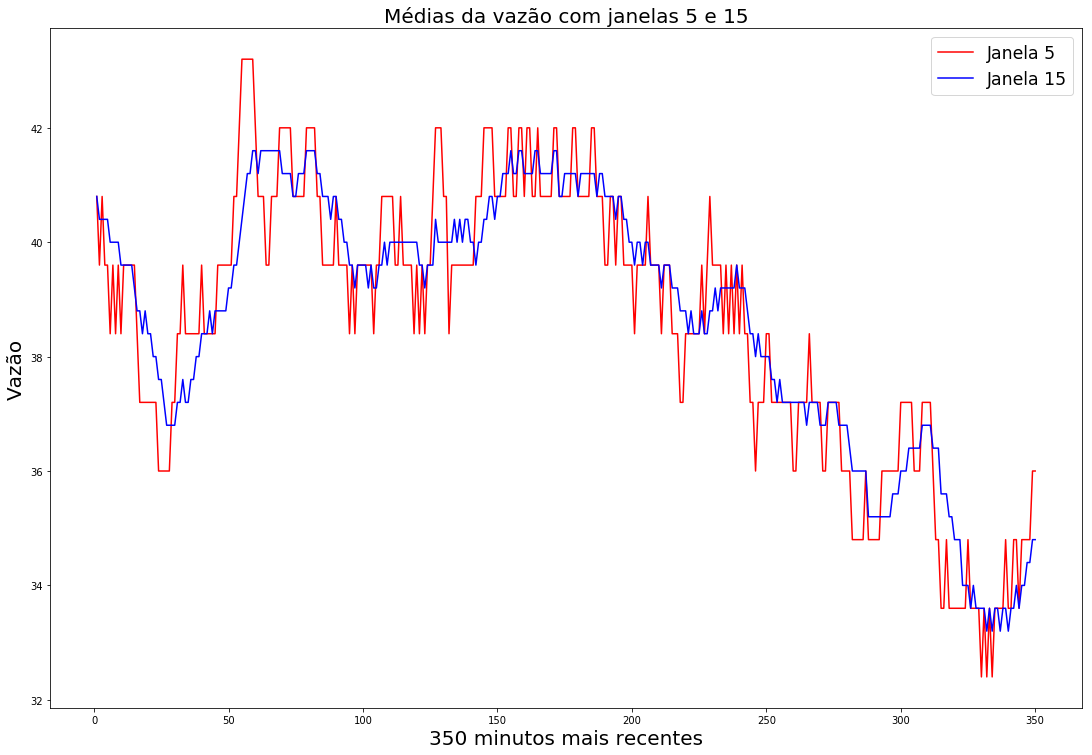

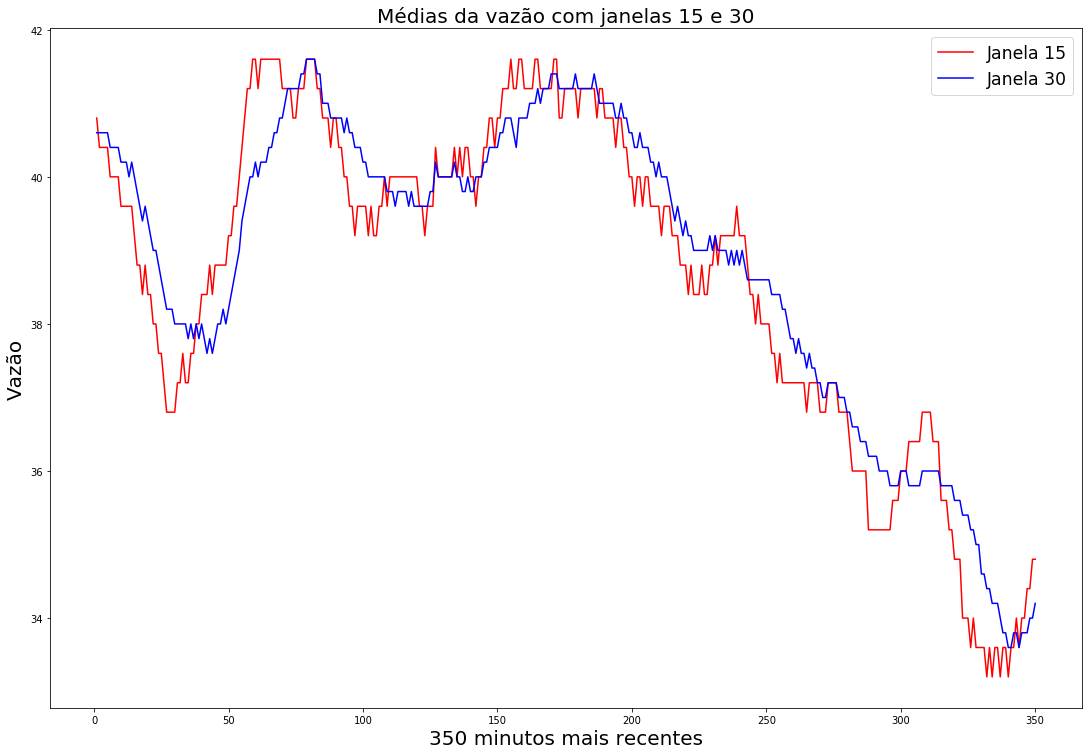

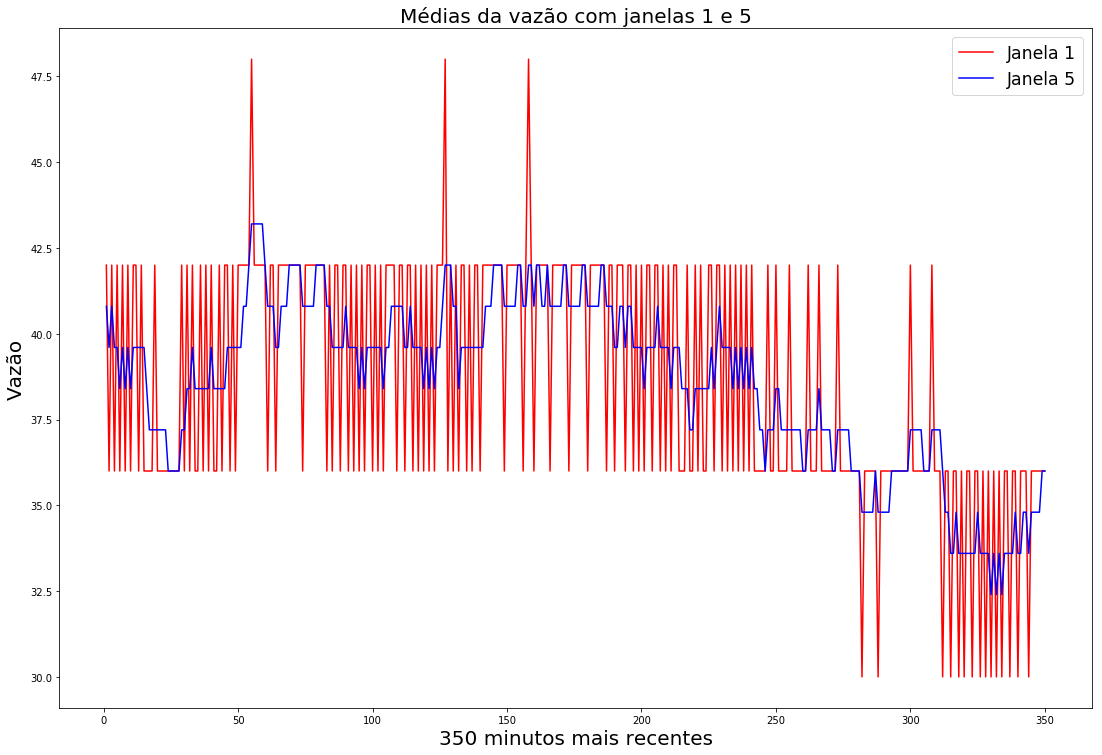

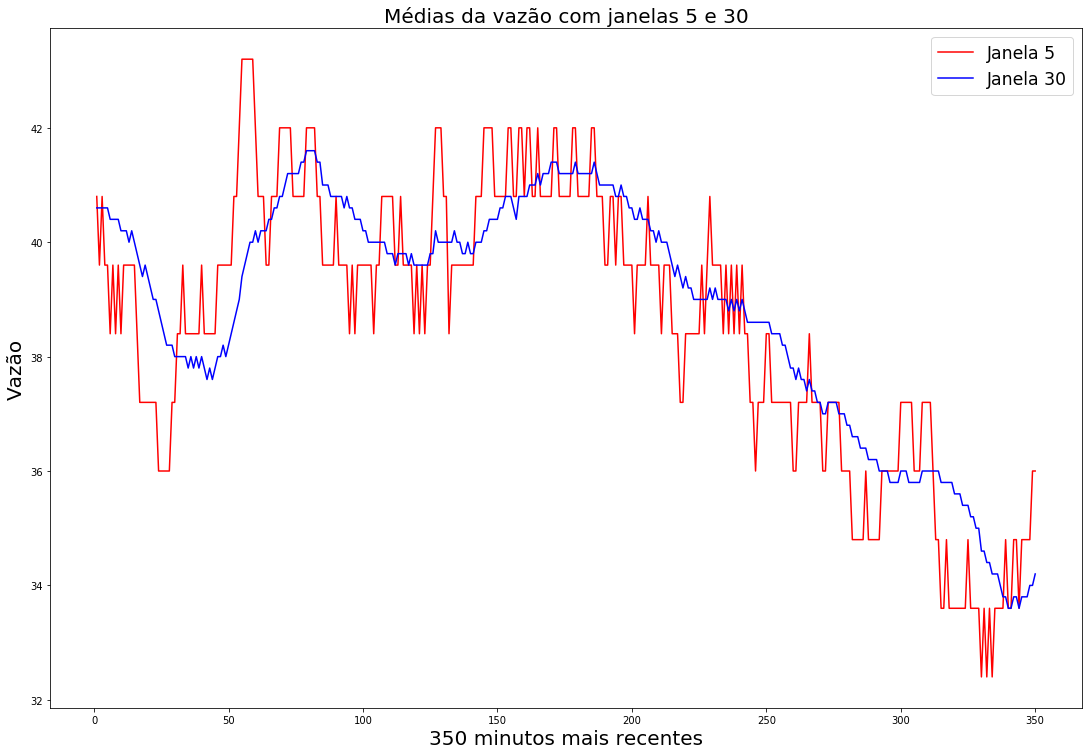

In [23]:
qtde_minutos = 350
plot_grafico2 (data_matrix, qtde_minutos, 1, 2)
plot_grafico2 (data_matrix, qtde_minutos, 2, 5)
plot_grafico2 (data_matrix, qtde_minutos, 5 ,15)
plot_grafico2 (data_matrix, qtde_minutos, 15, 30)
plot_grafico2 (data_matrix, qtde_minutos, 1, 5)
plot_grafico2 (data_matrix, qtde_minutos, 5, 30)

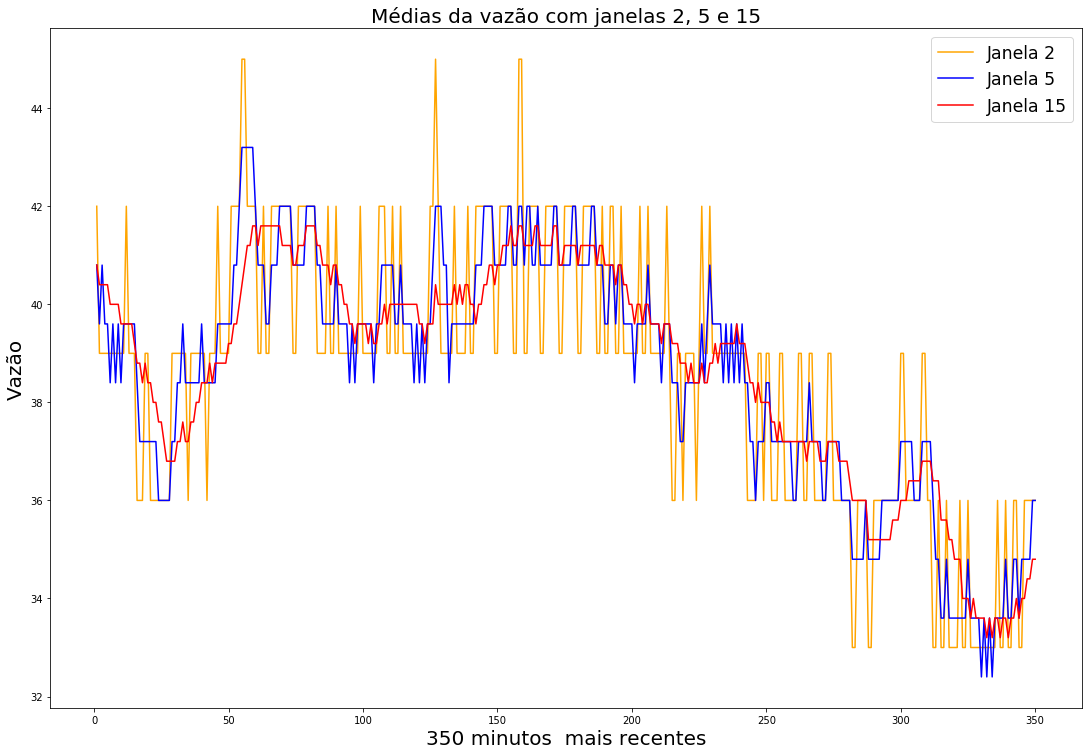

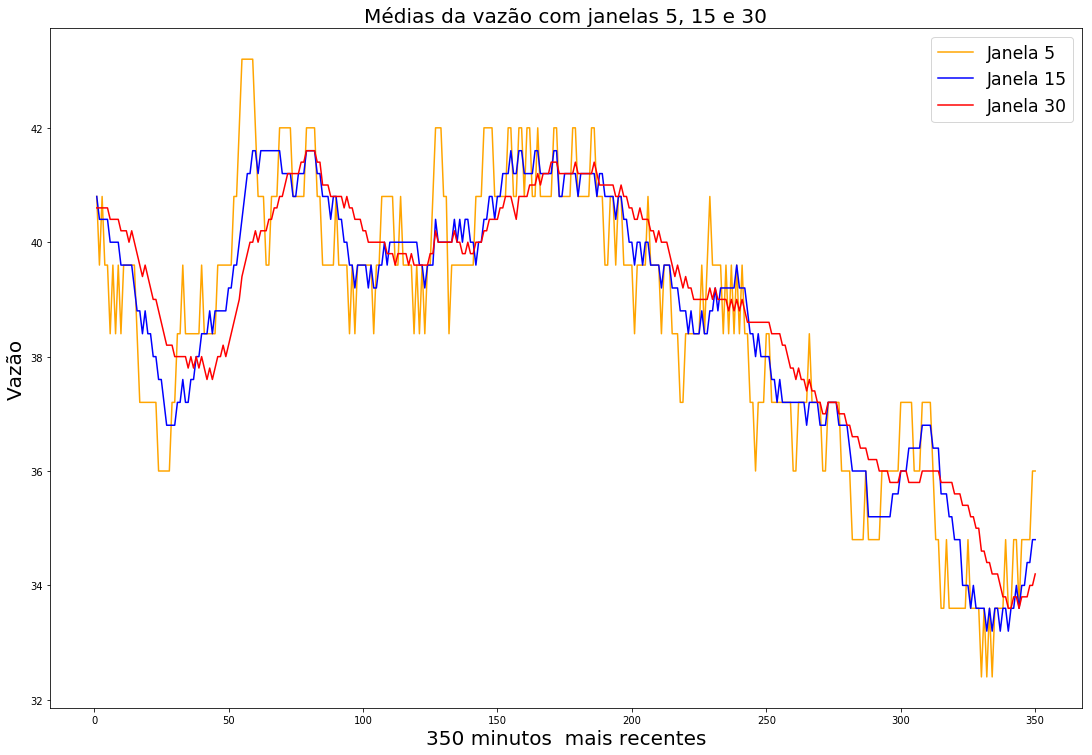

In [24]:
qtde_minutos = 350
plot_grafico3 (data_matrix, qtde_minutos, 2, 5, 15)
plot_grafico3 (data_matrix, qtde_minutos, 5, 15, 30)